# EMAIL SPAM DETECTION USING ENSEMBLE METHODS


Import pandas for data manipulation and analysis. We specifically use it to load and process our dataset.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.shape

(5572, 5)

# DATA PREPROCESSING

In [3]:
# Data Cleaning
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'Target', 'v2': 'Mail-Text'}, inplace=True)

# Handling missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(subset='Mail-Text', keep='first', inplace=True)

df.head()

,Target,Mail-Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize the stemmer and get English stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Normalize to lowercase
    text = text.lower()

    # Remove URLs, numbers, and punctuation
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Tokenization
    words = text.split()

    # Remove stop words and short words, and perform stemming
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(processed_words)

# Process the data
df['processed_text'] = df['Mail-Text'].apply(preprocess_text)

In [6]:
# Display results
print("Original Text:")
print(df['Mail-Text'])

print("\nProcessed Text:")
print(df['processed_text'])

Original Text:
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Mail-Text, Length: 5169, dtype: object

Processed Text:
0       jurong point crazi avail bugi great world buff...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkt may tex...
3                           dun say earli hor alreadi say
4               nah dont think goe usf live around th

In [7]:
print("Checking for NaN values in the target variable:")
print(df['Target'].isnull().sum())  # This will tell you how many NaNs are present


Checking for NaN values in the target variable:
0


In [8]:
df.shape

(5169, 3)

In [9]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

# DATA VISUALIZATION

In [10]:
#show a pie chart

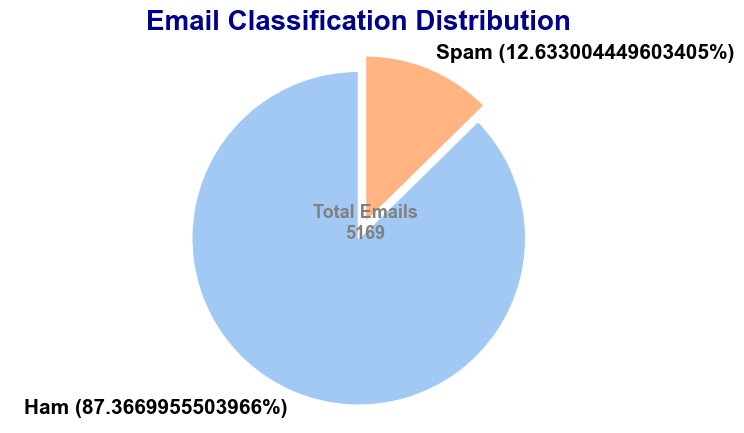

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: update these values based on your dataset outcomes
values = [4516, 653]  # Values for 'ham' and 'spam'

# Set Seaborn style
sns.set(style='whitegrid')

# Define colors from Seaborn palette
colors = sns.color_palette('pastel')[0:2]  # Choosing pastel colors for a softer look

# Define the explode parameter to create a gap between slices
explode = (0.1, 0)  # Explode the first slice (ham) slightly for a highlight effect

# Create a figure
plt.figure(figsize=(9, 5))

# Create the pie chart with custom properties
wedges, texts, autotexts = plt.pie(
    values,
    labels=['Ham ({}%)'.format(100 * values[0] / sum(values)), 'Spam ({}%)'.format(100 * values[1] / sum(values))],
    autopct='',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    explode=explode,
)

# Customize text properties
for text in texts:
    text.set(size=15, weight='bold', color='black')  # More prominent text

# Add a title with more styling
plt.title('Email Classification Distribution', fontsize=20, fontweight='bold', color='darkblue')

# Add central annotations for better clarity
plt.text(0, 0, 'Total Emails\n{}'.format(sum(values)), horizontalalignment='center', 
         verticalalignment='center', fontsize=13, weight='bold', color='gray')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()



# FEATURE EXTRACTION


Import TfidfVectorizer for converting text data into numerical format. TF-IDF stands for Term Frequency-Inverse Document Frequency, which helps measure the importance of a word in a document relative to a dataset.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

y = df["Target"]

print("\nTF-IDF Feature Matrix:")
print(X.toarray())


TF-IDF Feature Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Split the Data

Divide the dataset into training and testing subsets. A typical split might be 80% for training and 20% for testing. This allows you to evaluate model performance on unseen data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ENSEMBLE TECHNIQUES

# Bagging: Random Forest

RandomForestClassifier: Suitable for Bagging. It builds multiple decision trees and averages their results, which reduces overfitting and improves accuracy.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9700193423597679


In [15]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, rf_pred, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       889
        spam       0.99      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



# Boosting: AdaBoost

AdaBoostClassifier: A boosting technique that combines weak learners (like shallow trees) to form a strong classifier, focusing on mistakes made by previous models.

Import DecisionTreeClassifier: This is a basic model used as the base for AdaBoost and a strong, interpretable model for classification.


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting using AdaBoost
base = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(estimator=base, n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

#make prediction
ada_pred = ada_model.predict(X_test)

#evaluate model
ada_accuracy = accuracy_score(y_test, ada_pred)
print(f'AdaBoost Accuracy: {ada_accuracy:.2f}')

AdaBoost Accuracy: 0.97


In [17]:
# Classification report
print(classification_report(y_test, ada_pred, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       889
        spam       0.95      0.81      0.88       145

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



# Stacking

StackingClassifier: Combines predictions from multiple models (base learners) and uses another model as a meta-learner to improve accuracy.

Import LogisticRegression: Used as the final estimator in Stacking, this model works well for binary classification tasks and can serve as a meta-learner by making a complex decision on combined predictions.

Import SVC: Support Vector Classifier is included in stacking as a base model; it can create non-linear decision boundaries, which can be beneficial for complex datasets.

In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(estimator=base, n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train, y_train)

#make prediction
stacking_predict = stacking_model.predict(X_test)

stacking_accuracy = accuracy_score(y_test, stacking_predict)
print(f'Stacking Accuracy: {stacking_accuracy:.2f}')


Stacking Accuracy: 0.98


In [19]:
# Classification report
print(classification_report(y_test, stacking_predict, target_names=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.98      0.87      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



A stacking model performs higher precision or recall compared to individual models suggests it is better at minimizing errors in specific classes. 

In [20]:
def predict_spam(message):
    # Preprocess the input message using the same vectorizer used during training
    mesg = vectorizer.transform([message])
    # Use the trained model to make a prediction
    prediction = stacking_model.predict(mesg)
    # Return 'spam' or 'ham' based on prediction output
    return 'spam' if prediction[0] == 1 else 'ham'

# Example usage
new_message = "Congratulations! You've won a $1000 gift card!"
result = predict_spam(new_message)
print(f'The message is classified as: {result}')


The message is classified as: ham


# Predict Spam or Not Spam

In [21]:
import joblib

# Save model and vectorizer
joblib.dump(stacking_model, 'spam_classifier_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [ ]:

def load_model():
    model = joblib.load('spam_classifier_model.joblib')
    vectorizer = joblib.load('vectorizer.joblib')
    return model, vectorizer

def predict_spam(model, vectorizer, message):
    message_tfidf = vectorizer.transform([message])
    prediction = model.predict(message_tfidf)
    return 'spam' if prediction[0] == 1 else 'ham'

def main():
    print("Welcome to the Email Spam Detection System!")
    model, vectorizer = load_model()

    while True:
        user_input = input("Enter the email message (or type 'exit' to quit): ")

        if user_input.lower() == 'exit':
            break

        result = predict_spam(model, vectorizer, user_input)
        print(f'The message is classified as: {result}')

if __name__ == '__main__':
    main()

Welcome to the Email Spam Detection System!
Enter the email message (or type 'exit' to quit): Congratulations! You've won a $1000 gift card!
The message is classified as: ham
